In [5]:
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import datetime
import glob
from matplotlib.colors import Normalize, LogNorm, PowerNorm
import cv2
import PIL

from skimage.transform import hough_line, hough_line_peaks
from skimage.transform import resize
import matplotlib.pyplot as plt



def set_axis(x, no_labels = 7)->tuple[np.array, np.array]:
    """Sets the x-axis positions and labels for a plot.

    Args:
        x (np.array): The x-axis data.
        no_labels (int, optional): The number of labels to display. Defaults to 7.

    Returns:
        tuple[np.array, np.array]: A tuple containing:
            - The positions of the labels on the x-axis.
            - The labels themselves.
    """
    nx = x.shape[0]
    step_x = int(nx / (no_labels - 1)) 
    x_positions = np.arange(0,nx,step_x) 
    x_labels = x[::step_x]
    return x_positions, x_labels


In [6]:
def imshow(a):
    a = a.clip(0, 255).astype("uint8")
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(a))

In [7]:
!gdown https://drive.google.com/uc?id=1lJKLz3LsQmnAf9q5GGi6arEYBz-3CMhx -O 20240507.rar
!mkdir -p ./20240507_cut_npy
!unrar x 20240507.rar ./20240507_cut_npy
!rm 20240507.rar

'gdown' is not recognized as an internal or external command,
operable program or batch file.
The syntax of the command is incorrect.
'unrar' is not recognized as an internal or external command,
operable program or batch file.


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
path_out = '20240507_cut_npy/'
files = glob.glob(path_out+"*")
files.sort()

In [9]:
dx= 5.106500953873407
dt= 0.0016

data = []
first_file = '20240507_cut_npy\\092352.npy' #\\
last_file = '20240507_cut_npy\\092542.npy' #\\
for file in files:
   if file >= first_file and file <= last_file:
      data.append(np.load(file))

data = np.concatenate(data)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_file.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S") #\\
index = pd.date_range(start=time_start, periods=len(data), freq=f'{dt}s')


columns = np.arange(len(data[0])) * dx


df = pd.DataFrame(data=data, index=index, columns=columns)

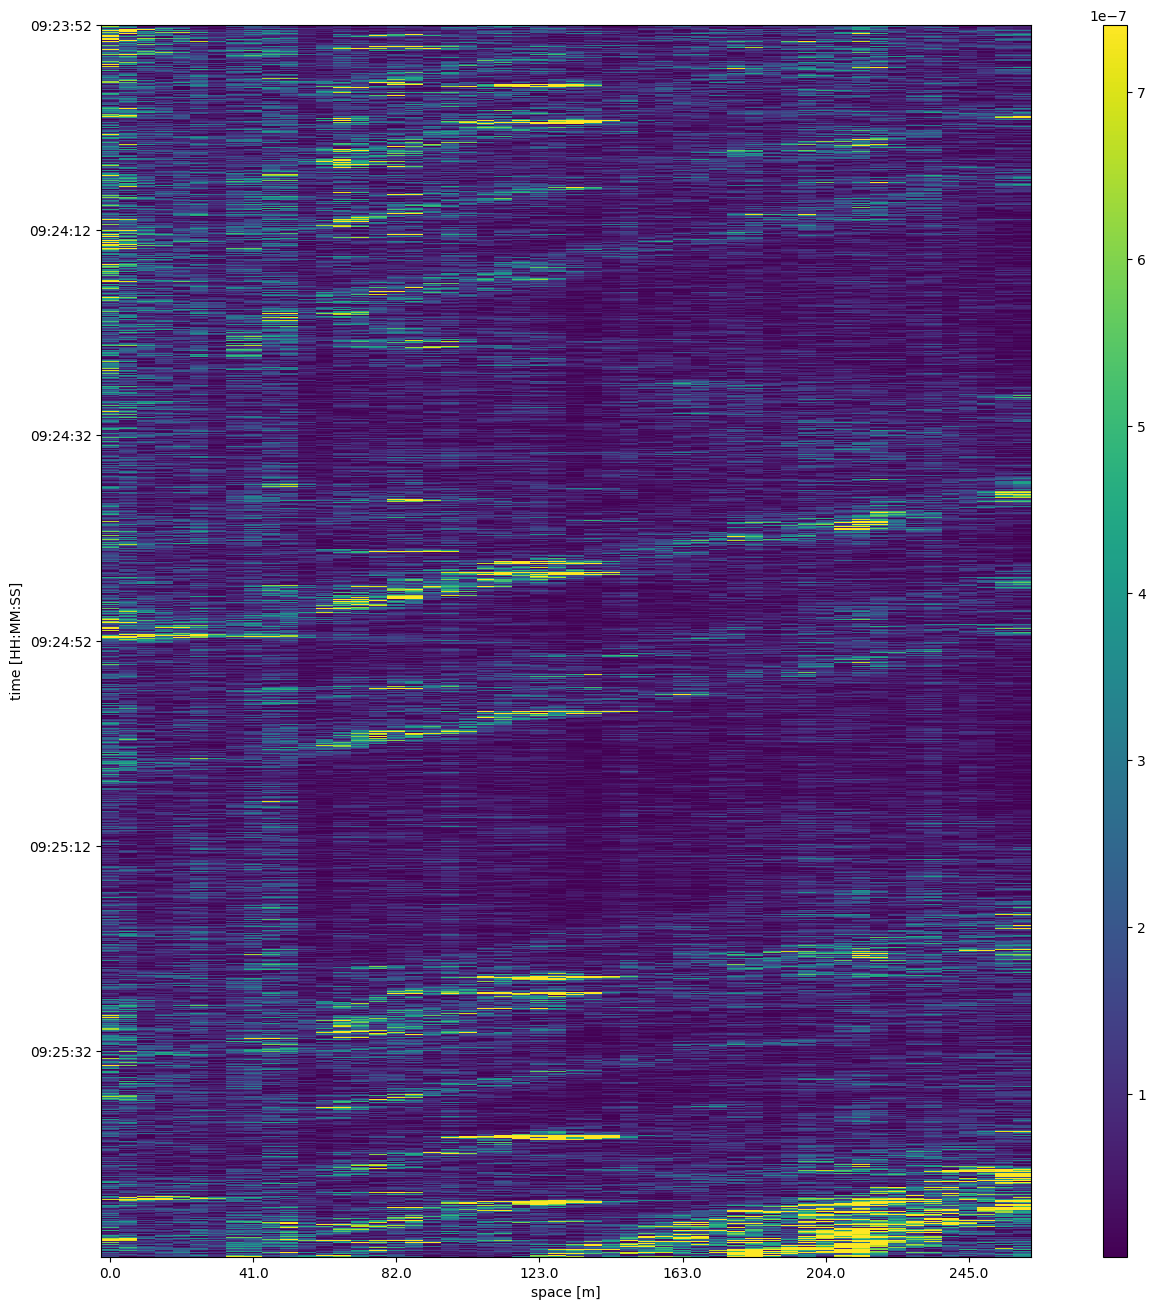

In [10]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df -= df.mean()
df = np.abs(df) 
low, high = np.percentile(df, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time [HH:MM:SS]')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()


# **Data analisys** #

In [11]:
# basic info about dataframe
np.info(df.values)
print("Max:", np.max(df))
print("Min:", np.min(df))
print("Mean:", np.mean(df))
print(np.percentile(df, [0, 5, 25, 50, 75, 95, 100]))

class:  ndarray
shape:  (75000, 52)
strides:  (208, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x22e6ecc9040
byteorder:  little
byteswap:  False
type: float32
Max: 2.972713e-05
Min: 8.790718e-12
Mean: 1.1305762e-07
[8.79071815e-12 4.82473217e-09 2.84826793e-08 6.69117384e-08
 1.32913272e-07 3.44083676e-07 2.97271308e-05]


In [ ]:
def plotting_function(data, idx, cols, norm=None):
    """
    Visualizes a 2D dataset as a heatmap with labeled axes and a color bar.

    Parameters:
    ----------
    data : ndarray
        The 2D array containing the data to be plotted.
    idx : iterable
        The row index for the data, corresponding to time.
    cols : iterable
        The column index for the data, corresponding to space.
    norm : matplotlib.colors.Normalize, optional
        A normalization instance to scale the colormap. If None, no normalization is applied.

    Returns:
    -------
    None
        The function displays the heatmap and does not return any value.
    """
    df = pd.DataFrame(data, index = idx, columns=cols)

    fig = plt.figure(figsize=(12,16))
    ax = plt.axes()
    
    if norm is not None:
        im = ax.imshow(df,interpolation='none',aspect='auto',norm=norm)
    else:
        im = ax.imshow(df,interpolation='none',aspect='auto')

    plt.ylabel('time [HH:MM:SS]')
    plt.xlabel('space [m]')

    cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(im, cax=cax)
    x_positions, x_labels = set_axis(cols)
    ax.set_xticks(x_positions, np.round(x_labels))
    y_positions, y_labels = set_axis(df.index.time)
    ax.set_yticks(y_positions, y_labels)
    plt.show()

def display_gray(data, idx, cols, norm=None):
    """
    Visualizes a 2D dataset as a heatmap in a grayscale with labeled axes and a color bar.

    Parameters:
    ----------
    data : ndarray
        The 2D array containing the data to be plotted.
    idx : iterable
        The row index for the data, corresponding to time.
    cols : iterable
        The column index for the data, corresponding to space.
    norm : matplotlib.colors.Normalize, optional
        A normalization instance to scale the colormap. If None, no normalization is applied.

    Returns:
    -------
    None
        The function displays the heatmap in a grayscale and does not return any value.
    """
    df = pd.DataFrame(data, index = idx, columns=cols)

    fig = plt.figure(figsize=(12,16))
    ax = plt.axes()
    
    if norm is not None:
        im = ax.imshow(df,interpolation='none',aspect='auto',norm=norm, cmap='gray')
    else:
        im = ax.imshow(df,interpolation='none',aspect='auto', cmap='gray')

    plt.ylabel('time [HH:MM:SS]')
    plt.xlabel('space [m]')

    cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(im, cax=cax)
    x_positions, x_labels = set_axis(cols)
    ax.set_xticks(x_positions, np.round(x_labels))
    y_positions, y_labels = set_axis(df.index.time)
    ax.set_yticks(y_positions, y_labels)
    plt.show()

## **Step 0** ##

### **a) Plotting raw data** ###

In [16]:
# plt.imshow(data, aspect='auto', origin='lower', cmap='plasma')
# plt.colorbar(label='Amplitude')
# plt.title('DAS Data: Heatmap')
# plt.xlabel('Time')
# plt.ylabel('Distance')
# plt.show()

### **b) Min-Max normalization** ###

In [17]:
# low, high = np.percentile(df, [0, 100]) 
# norm = Normalize(vmin=low, vmax=high, clip=True)

# plotting_function(abs(data), index, columns, norm)

### **b) Min-Max Normalization upgraded** ###

In [18]:
low, high = np.percentile(df, [3, 99]) 
norm_mm = Normalize(vmin=low, vmax=high, clip=True)

plotting_function(abs(data), index, columns, norm_mm)

NameError: name 'plotting_function' is not defined

### **c) Log scaling** ###

In [19]:
# low, high = np.percentile(df, [2, 98]) 
# norm_log = LogNorm(vmin=low, vmax=high, clip=True)

# plotting_function(abs(data), index, columns, norm_log)

### **d) Power Norm Scaling** ###

In [20]:
# low, high = np.percentile(df, [2, 98]) 
# norm_power = PowerNorm(vmin=low, vmax=high, clip=True, gamma = 2) #The higher gamma, the less noise we have in data but also less data

# plotting_function(abs(data), index, columns, norm_power)

### **d) Standardized data** ###

In [21]:
standardized_data = (abs(data) - np.mean(abs(data))) / np.std(abs(data))

plotting_function(standardized_data, index, columns)

NameError: name 'plotting_function' is not defined

### **e) Grayscale image** ###

In [22]:
norm_mm_data = norm_mm(abs(data))
# norm_log_data = norm_log(abs(data))
# norm_power_data = norm_power(abs(data))
standardized_data = (abs(data) - np.mean(abs(data))) / np.std(abs(data))

display_gray(norm_mm_data, index, columns)

NameError: name 'display_gray' is not defined

In [23]:
# display_gray(norm_log_data, index, columns)

In [24]:
# display_gray(norm_power_data, index, columns)

### **f) Binarized Image** ###

In [25]:
threshold = np.percentile(standardized_data, [86])
binarized_img = norm_mm_data > threshold
display_gray(binarized_img, index, columns) # No matter which data we take, result is always the same

NameError: name 'display_gray' is not defined

### **g) Morphological operations** ###

#### **1. Proper Closing** ####

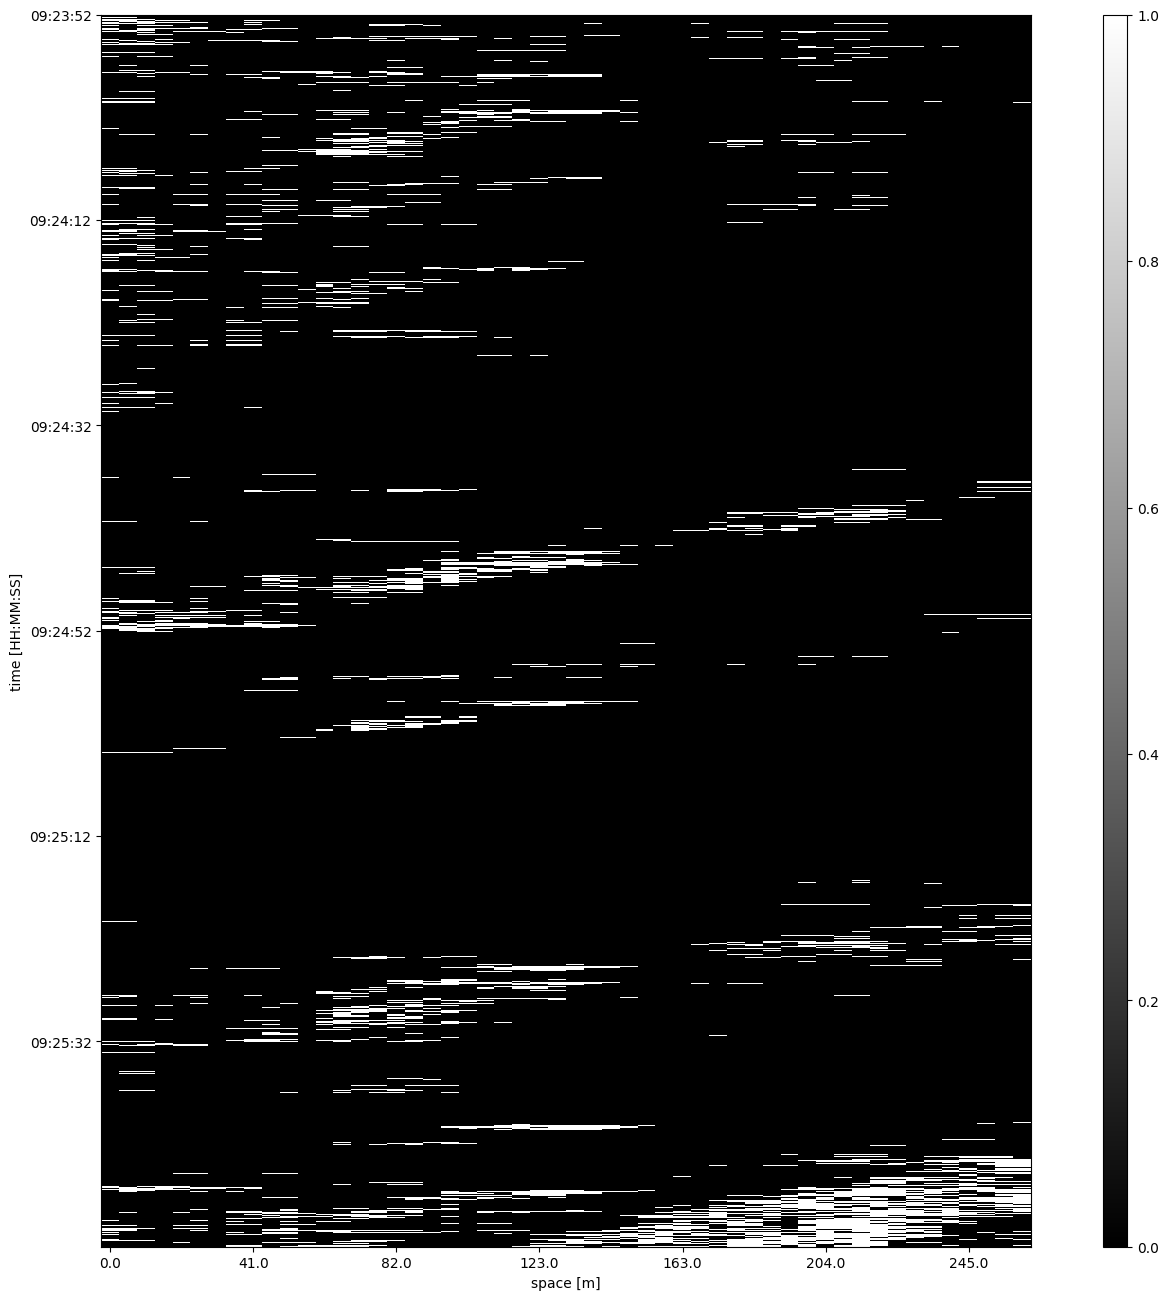

In [22]:
struct = np.ones([5, 5], np.uint8)

operation_1a = cv2.morphologyEx(binarized_img.astype(np.uint8) * 255, cv2.MORPH_CLOSE, struct)
operation_1b = cv2.morphologyEx(operation_1a, cv2.MORPH_OPEN, struct)
operation_1c = cv2.morphologyEx(operation_1b, cv2.MORPH_CLOSE, struct)
operation_1 = np.minimum(binarized_img, operation_1c)

display_gray(operation_1, index, columns)

#### **2. Proper Opening** ####

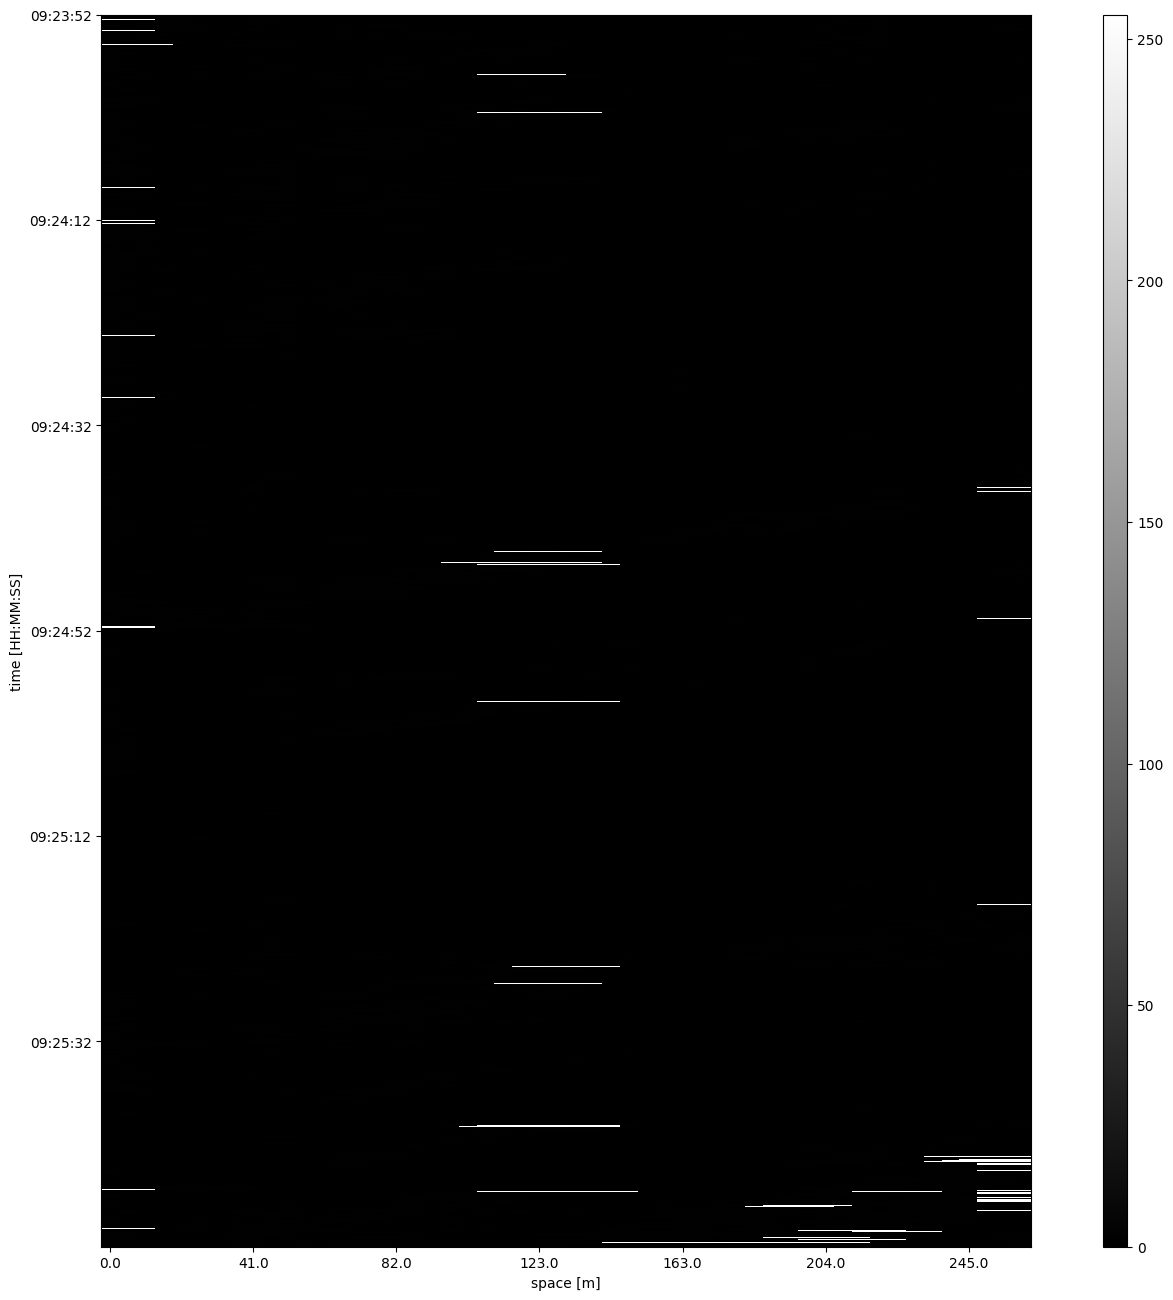

In [23]:
operation_2a = cv2.morphologyEx(binarized_img.astype(np.uint8) * 255, cv2.MORPH_OPEN, struct)
operation_2b = cv2.morphologyEx(operation_2a, cv2.MORPH_CLOSE, struct)
operation_2c = cv2.morphologyEx(operation_2b, cv2.MORPH_OPEN, struct)
operation_2 = np.maximum(binarized_img, operation_2c)

display_gray(operation_2, index, columns)

#### **Automedian Filter** ####

In [24]:
def automedian_filter(img, struct):
    img_c = cv2.morphologyEx(img, cv2.MORPH_CLOSE, struct)
    img_co = cv2.morphologyEx(img_c, cv2.MORPH_OPEN, struct)
    img_coc = cv2.morphologyEx(img_co, cv2.MORPH_CLOSE, struct)

    img_o = cv2.morphologyEx(img, cv2.MORPH_OPEN, struct)
    img_oc = cv2.morphologyEx(img_o, cv2.MORPH_CLOSE, struct)
    img_oco = cv2.morphologyEx(img_oc, cv2.MORPH_OPEN, struct)

    Q_f = np.minimum(img_coc, img)
    A_f = np.maximum(Q_f, img_oco)

    return A_f

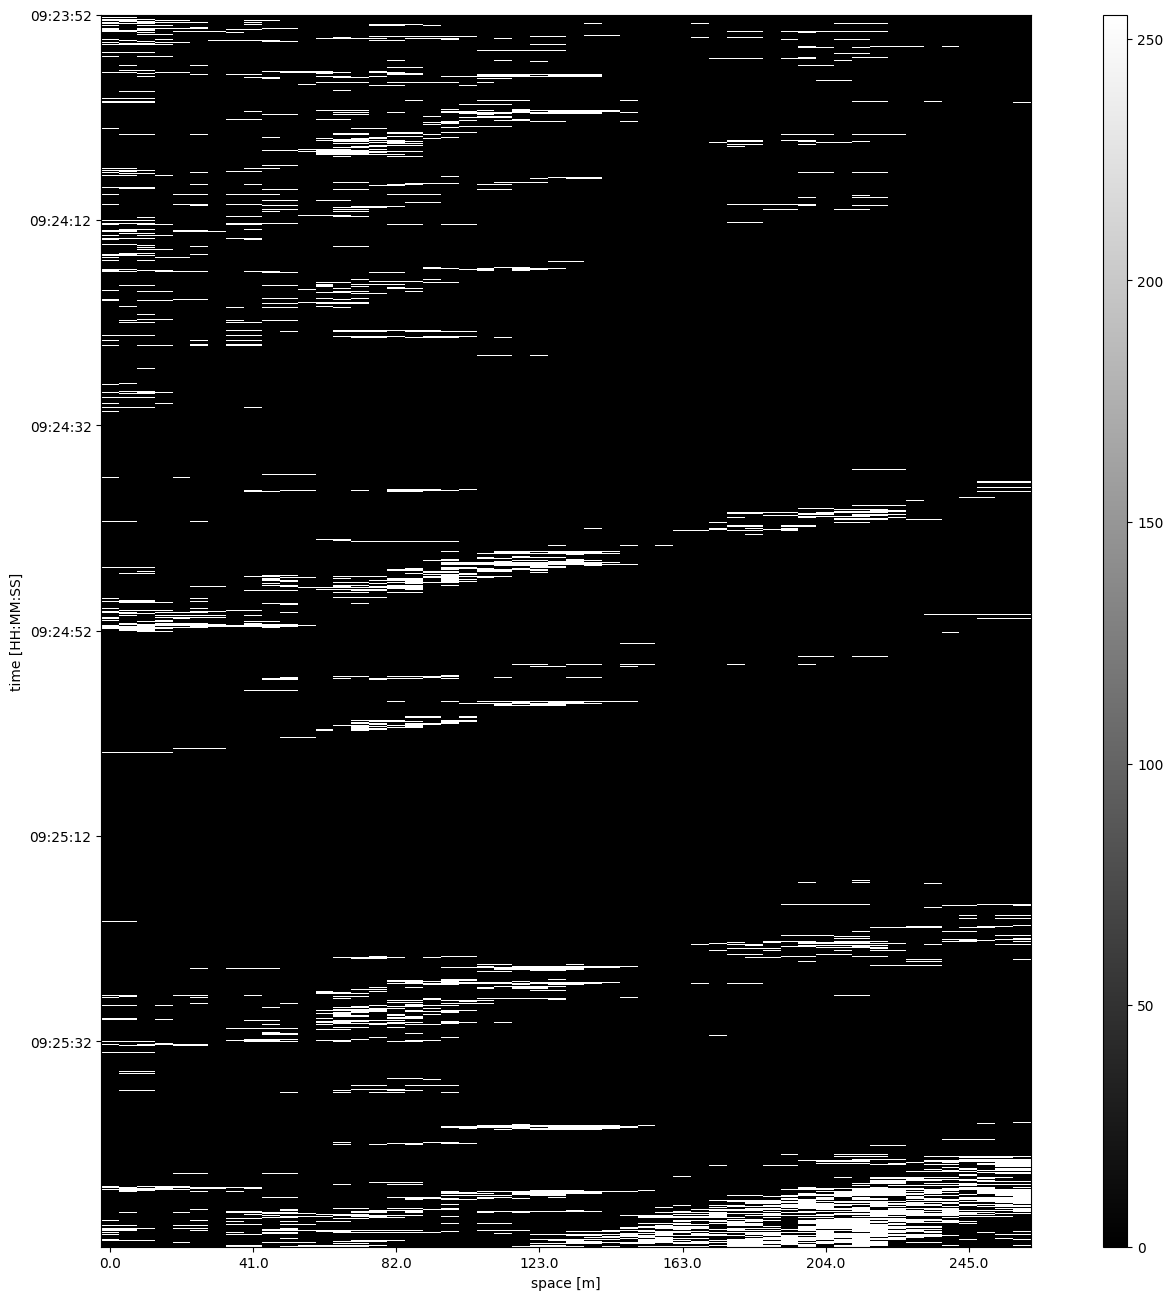

In [25]:
operation_3 = automedian_filter(binarized_img.astype(np.uint8) * 255, struct) # AUTOMEDIAN FILTER
display_gray(operation_3, index, columns)

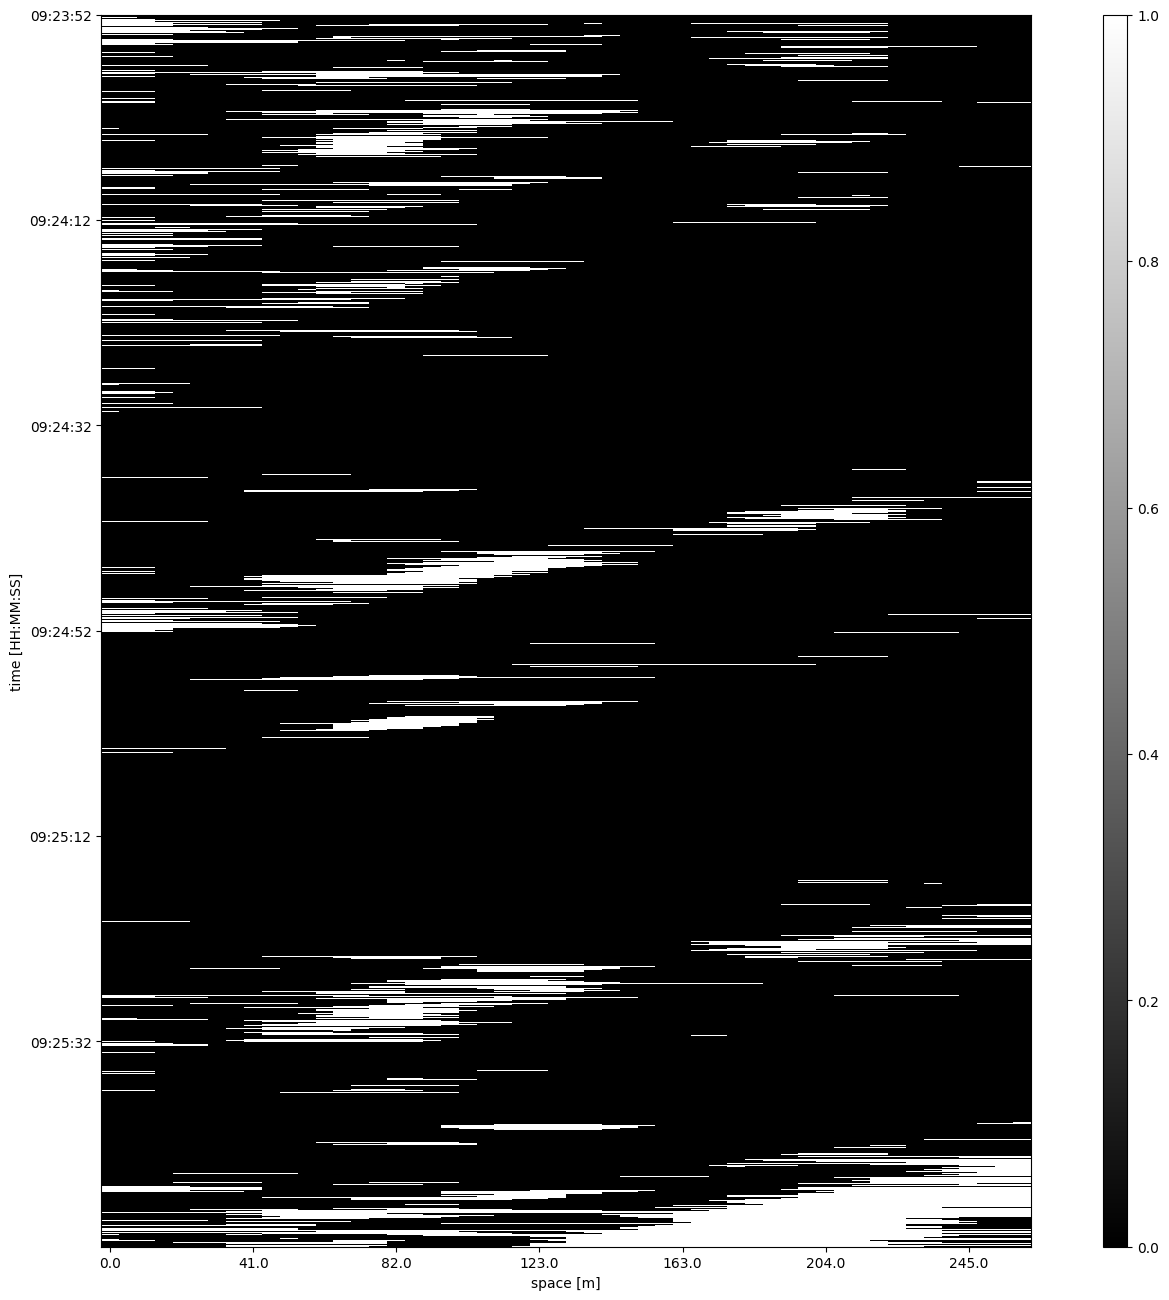

In [26]:
operation_4 = cv2.morphologyEx(operation_3.astype(np.uint8) * 255, cv2.MORPH_CLOSE, struct) # AUTOMEDIAN FILTER, CLOSING
display_gray(operation_4, index, columns)

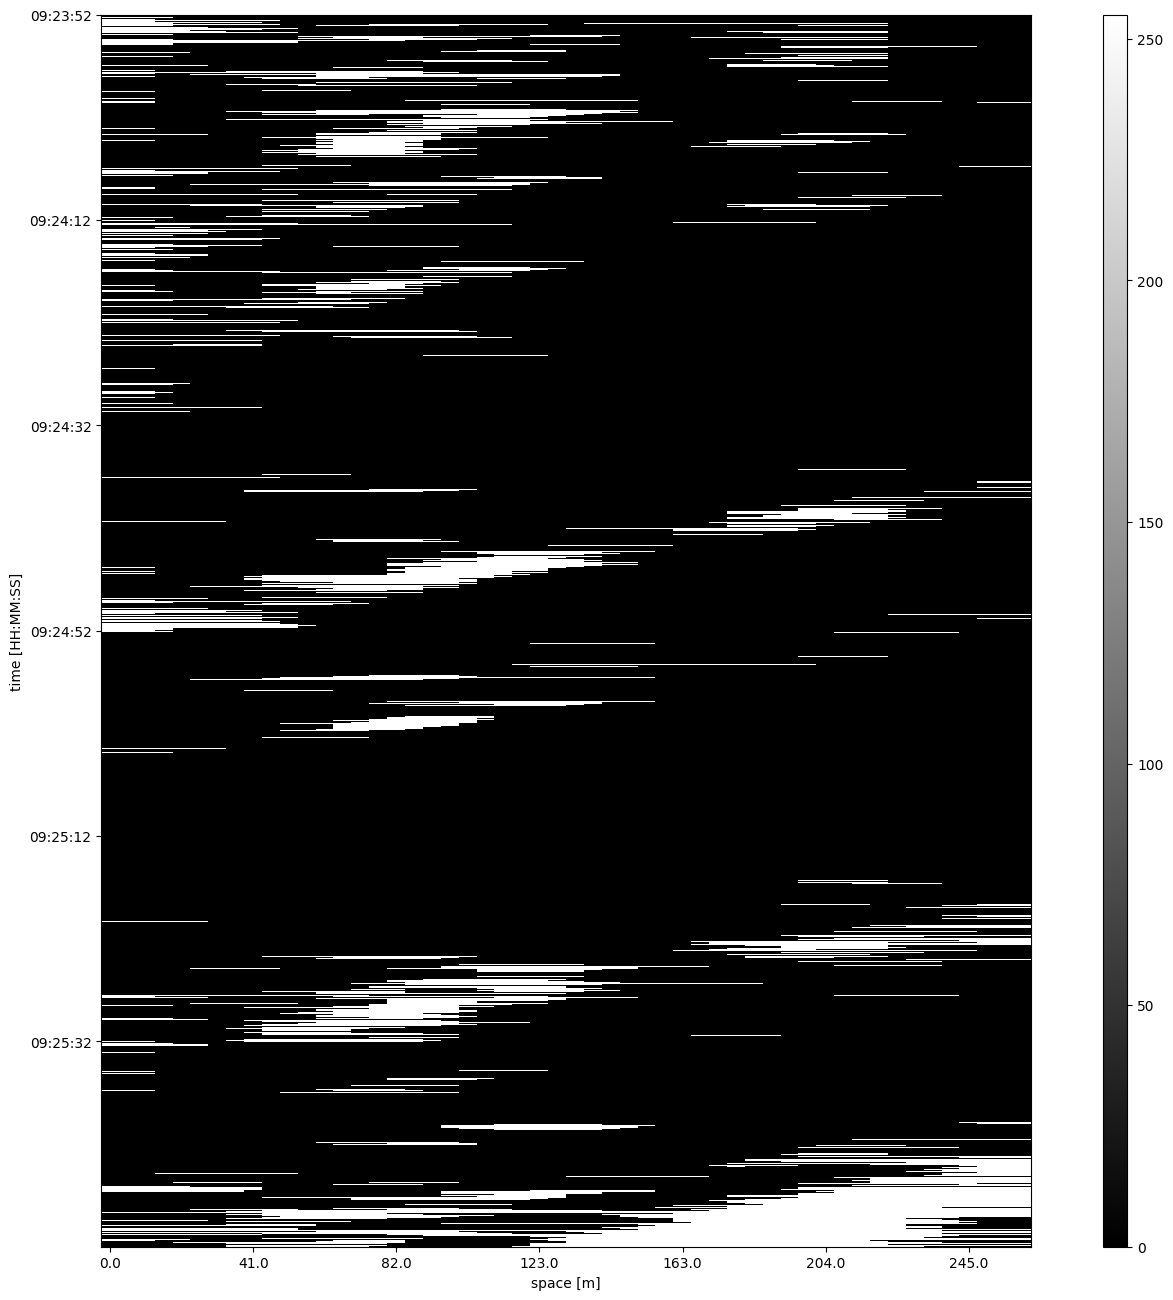

In [27]:
operation_5 = cv2.morphologyEx(binarized_img.astype(np.uint8) * 255, cv2.MORPH_CLOSE, struct) # CLOSING
operation_5 = automedian_filter(operation_5.astype(np.uint8) * 255, struct) # AUTOMEDIAN
operation_5 = automedian_filter(operation_5.astype(np.uint8) * 255, struct) # AUTOMEDIAN 2
display_gray(operation_5, index, columns)

# I think we dont use next 2 cells #

In [12]:
# from numpy.lib.stride_tricks import as_strided

# def match(img,struct):
#     pad_width= (struct.shape[0] - 1) // 2
#     pad_height = (struct.shape[1] - 1) // 2
#     padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=-2)
#     window_shape = struct.shape
#     output_shape = (padded_img.shape[0] - window_shape[0] + 1, padded_img.shape[1] - window_shape[1] + 1)
#     strides = padded_img.strides * 2
#     windowed_img = as_strided(padded_img, shape=output_shape + window_shape, strides=strides)
#     return windowed_img
    

# def dilate(img: np.ndarray, struct: np.ndarray) -> np.ndarray:
#     windowed_img = match(img, struct)
#     match_1 = (windowed_img == 0) & (struct == -1) 
#     match_2 = (windowed_img == 1) & (struct == 1)
#     dilation_matches = match_1 | match_2
#     dilated_img = np.max(dilation_matches, axis=(-2, -1))
#     return dilated_img
# def erode(img: np.ndarray, struct: np.ndarray) -> np.ndarray:
#     windowed_img = match(img, struct)
#     match_1 = (windowed_img == 0) & (struct == -1) 
#     match_2 = (windowed_img == 1) & (struct == 1)
#     match_3 = (struct==0)
#     erode_matches = match_1 | match_2 |match_3
#     eroded_img = np.min(erode_matches, axis=(-2, -1))
#     return eroded_img

# def skeletonize(img):
#     skeleton = np.logical_not(img.copy())
#     skeleton_pr = None

#     shape = skeleton.shape

#     if (shape[0] != shape[1]):
#         padding = (shape[0] - shape[1])//2
#         rem = shape[0] - shape[1] - 2 * padding

#     del shape

#     s1 = np.array([[-1, -1, -1], [0, 1, 0], [1, 1, 1]])
#     s2 = np.array([[0, -1, -1], [1, 1, -1], [0, 1, 0]])

#     change = True
#     iteration = 0

#     while change and iteration < 25:
#         iteration += 1
#         print(iteration)
#         for _ in range(4):
#             hit_or_miss_1 = erode(skeleton, s1)
#             neg_hit_or_miss_1 = np.logical_not(hit_or_miss_1)
#             skeleton = np.logical_and(skeleton, neg_hit_or_miss_1)
#             del neg_hit_or_miss_1, hit_or_miss_1

#             hit_or_miss_2 = erode(skeleton, s2)
#             neg_hit_or_miss_2 = np.logical_not(hit_or_miss_2)
#             skeleton = np.logical_and(skeleton, neg_hit_or_miss_2)
#             del neg_hit_or_miss_2, neg_hit_or_miss_2

#             s1 = np.rot90(s1)
#             s2 = np.rot90(s2)

#         if np.all(skeleton == skeleton_pr):
#                 change = False
#         skeleton_pr = skeleton.copy()
#     return skeleton

In [29]:
# skeleton = skeletonize(binarized_img)

Original shape: (75000, 52)
Resized shape: (750, 572)


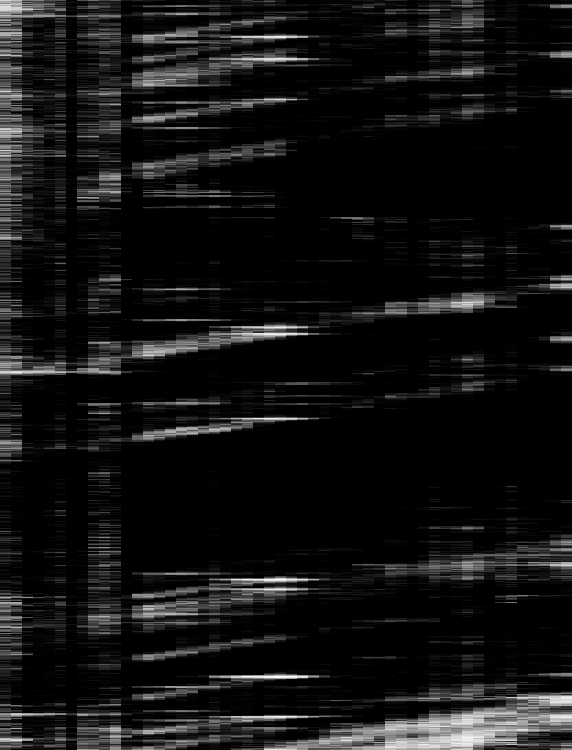

In [ ]:
def downsample_vertical(image, factor):
    """
    Reduces the vertical resolution of an image by averaging groups of rows.

    Parameters:
    ----------
    image : ndarray
        The input 2D array representing the image.
    factor : int, optional
        The factor by which to downsample the image vertically.

    Returns:
    -------
    ndarray
        The vertically downsampled image, with the number of rows reduced by the specified factor.
    """
    return image.reshape(image.shape[0] // factor, factor, image.shape[1]).mean(axis=1)


def expand_horizontal(image, factor):
    """
    Expands the horizontal resolution of an image by repeating each pixel value.

    Parameters:
    ----------
    image : ndarray
        The input 2D array representing the image.
    factor : int, optional
        The number of times each pixel value is repeated horizontally.

    Returns:
    -------
    ndarray
        The horizontally expanded image, with the number of columns increased by the specified factor.
    """
    return np.repeat(image, factor, axis=1)


def scale_to_255(image):
    """
    Normalizes an image to the range 0-255.

    Parameters:
    ----------
    image : ndarray
        The input 2D array representing the image.

    Returns:
    -------
    ndarray
        The normalized image scaled to the range 0-255 and converted to uint8.
    """
    scaled_image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return (scaled_image * 255).astype(np.uint8)


downsampled_img = downsample_vertical(binarized_img, factor=100)
resized_img = expand_horizontal(downsampled_img, factor=11)

print(f"Original shape: {norm_mm_data.shape}")
print(f"Resized shape: {resized_img.shape}")

scaled_img = scale_to_255(resized_img)

imshow(scaled_img)


# Next 3 cells to be deleted right? #

In [31]:
# from sklearn.cluster import DBSCAN

# gray = scaled_image.astype(np.uint8)
# print("Grayscaled:")
# # imshow(gray)

# thr = np.percentile(gray, [90])

# binarized = (gray > thr).astype(np.uint8) * 255
# print("Binarized")
# # imshow(binarized)

# gray_auto = automedian_filter(binarized, np.ones((7, 7)))
# print("Grayscaled, automedian:")
# # imshow(gray_auto)

# gray_bl = cv2.GaussianBlur(gray_auto, (21, 21), 1)
# print("Grayscaled, automedian, blurred")
# # imshow(gray_bl)

# img_after_pre = gray_bl.copy()
# # imshow(img_after_pre)

# tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 361, endpoint=False)
# h, theta, d = hough_line(img_after_pre, theta=tested_angles)

# accumulator, angles, distances = hough_line_peaks(h, theta, d)

# # Combine distances and angles for clustering
# lines = np.column_stack((distances, angles))

# # Apply DBSCAN clustering
# dbscan = DBSCAN(eps = 36, min_samples=1).fit(lines)  # Adjust eps for clustering sensitivity
# unique_labels = set(dbscan.labels_)

# # Filter lines: Keep the most prominent line (highest accumulator) from each cluster
# filtered_lines = []
# for label in unique_labels:
#     cluster_indices = np.where(dbscan.labels_ == label)[0]
#     if cluster_indices.size > 0:
#         # Select the line with the highest accumulator value in the cluster
#         max_acc_idx = cluster_indices[np.argmax(accumulator[cluster_indices])]
#         filtered_lines.append((distances[max_acc_idx], angles[max_acc_idx]))

# # Visualization: Detected lines overlaid on the original image
# fig = plt.figure(figsize=(12, 16))
# ax = plt.axes()
# ax.imshow(img_after_pre)
# ax.set_ylim((img_after_pre.shape[0], 0))
# ax.set_xlim((0, img_after_pre.shape[1]))

# # Overlay filtered lines
# for dist, angle in filtered_lines:
#     # Example speed calculation (optional, adjust as needed)
#     speed = 1 / (abs(np.tan(angle + np.pi / 2) * (1100 * dt) / dx)) * 3.6
#     if 30 < speed < 150:  # Filter lines based on speed
#         x0, y0 = dist * np.array([np.cos(angle), np.sin(angle)])
#         ax.axline(
#             (x0, y0),
#             slope=np.tan(angle + np.pi / 2),
#             color='red',
#             linewidth=2,
#             linestyle='--',
#             label=f"Slope: {np.tan(angle + np.pi / 2):.3f}, Speed: {speed:.1f} km/h",
#         )

# # Add legend for line parameters
# ax.legend(loc='upper right', fontsize='small')
# plt.tight_layout()
# plt.show()

In [32]:
def compute_intersections(distances, angles, img_shape):
    """Compute the intersection points of lines with the image edges."""
    intersections = []
    height, width = img_shape

    for dist, angle in zip(distances, angles):
        # Compute line parameters
        a, b = np.cos(angle), np.sin(angle)
        x0, y0 = a * dist, b * dist  # Closest point to the origin
        slope = -a / b if b != 0 else np.inf  # Slope of the line

        # Compute intersection points with image edges
        points = []
        # Intersect with vertical edges (x=0 and x=width)
        if slope != np.inf:
            points.append((0, y0 - slope * x0))  # x = 0
            points.append((width, y0 + slope * (width - x0)))  # x = width

        # Intersect with horizontal edges (y=0 and y=height)
        if slope != 0:
            points.append((x0 - y0 / slope, 0))  # y = 0
            points.append((x0 + (height - y0) / slope, height))  # y = height

        # Keep valid points within the image boundaries
        valid_points = [(x, y) for x, y in points if 0 <= x <= width and 0 <= y <= height]
        intersections.append(valid_points)

    return intersections

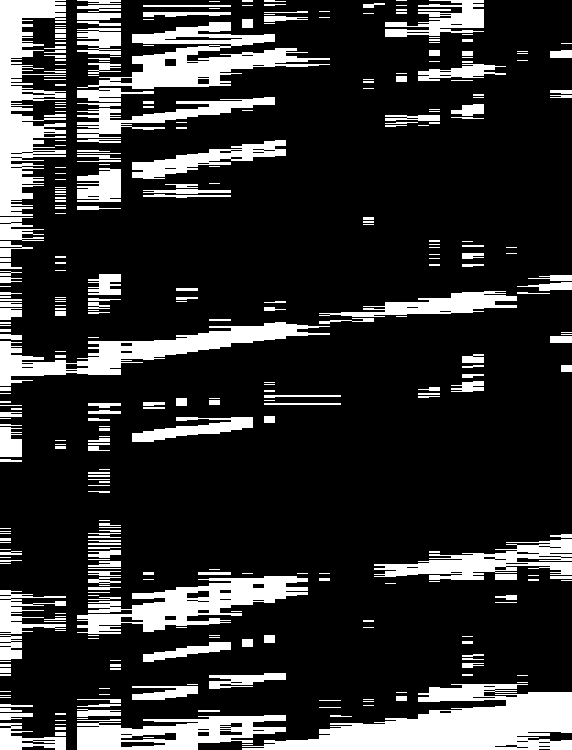

In [33]:
imshow(automedian_filter((scaled_image > 25).astype(np.uint8) * 255, np.ones((7, 7))))

C:\Users\user\AppData\Local\Temp\ipykernel_6928\1983085919.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  speed = np.where(slope != 0, 1 / (abs(slope) * (1100 * dt) / dx) * 3.6, 0)
C:\Users\user\AppData\Local\Temp\ipykernel_6928\1983085919.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  speed = np.where(slope != 0, 1 / (abs(slope) * (1100 * dt) / dx) * 3.6, 0)


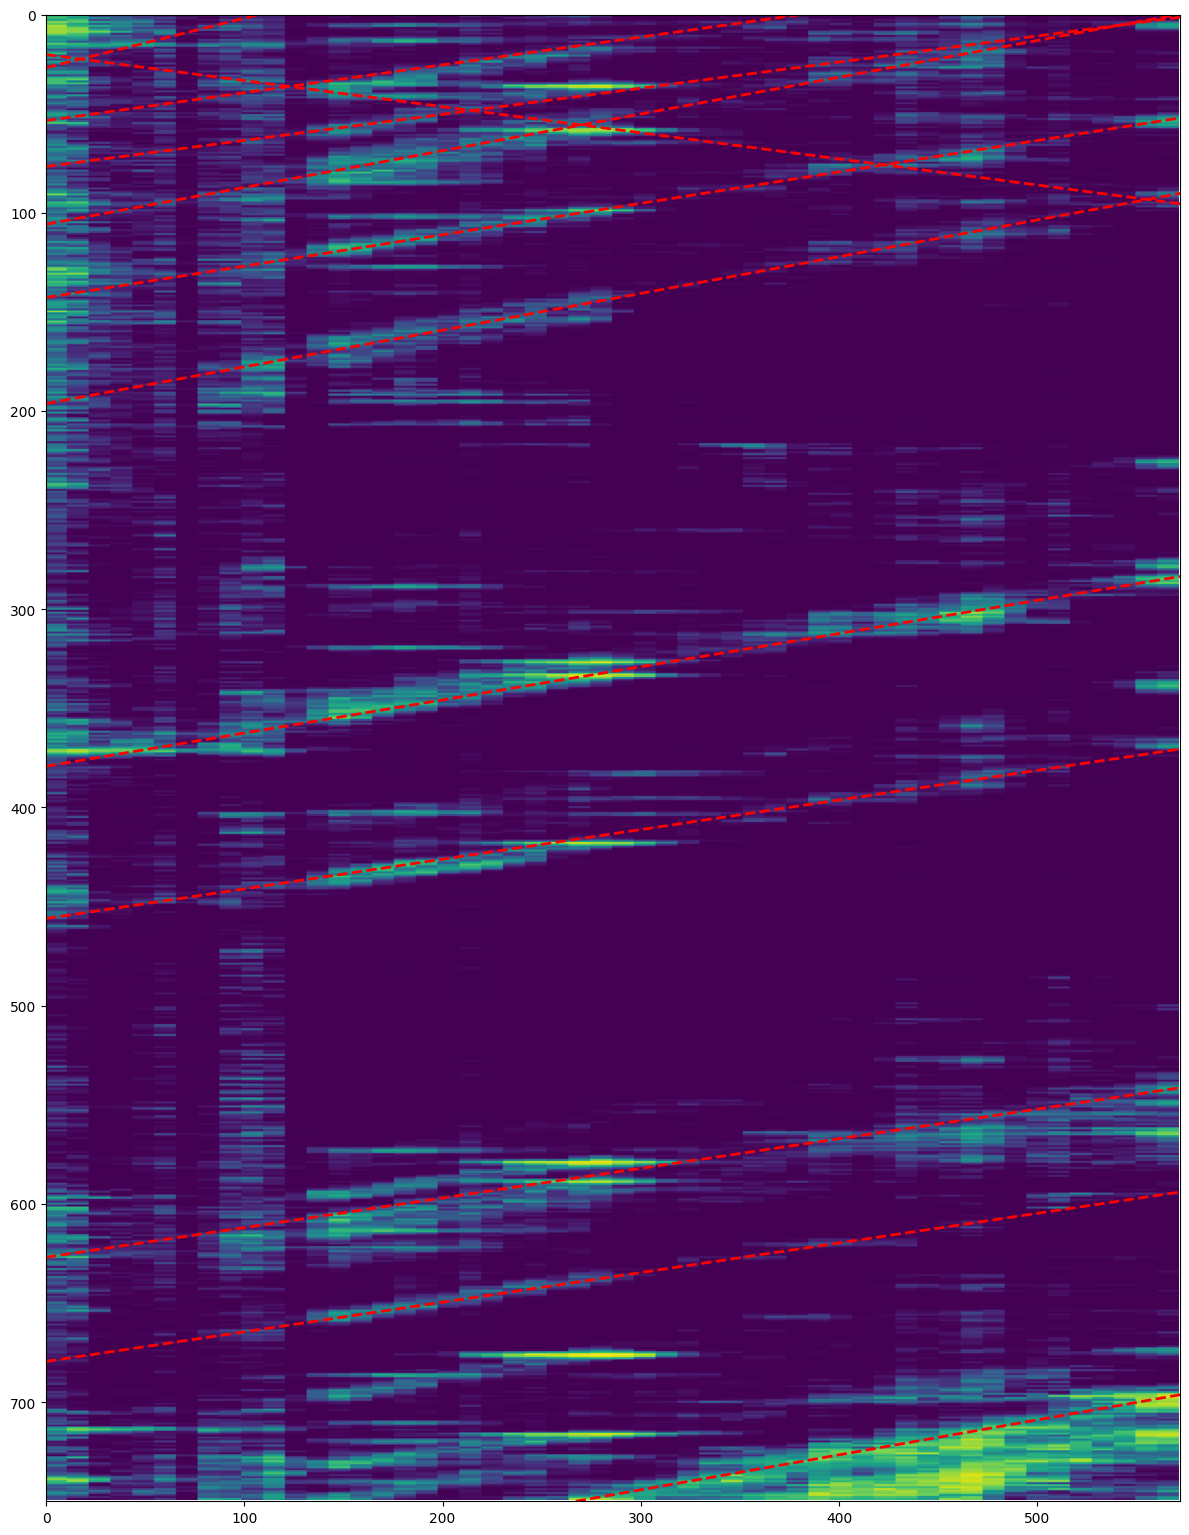

In [ ]:
# DETECTING STREAKS NEAR BOUNDARIES WITH PADDING

# Hough
pad_h = int(0.15 * scaled_img.shape[0])
scaled_img_pad = np.pad(scaled_img, ((pad_h, pad_h), (0, 0)), "edge")

# Hough Transform on the scaled image
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(scaled_img, theta=tested_angles)
h_pad, theta_pad, d_pad = hough_line(scaled_img_pad, theta=tested_angles)

# Visualization: Detected lines overlaid on the original image
fig, ax = plt.subplots(figsize=(12, 16))
ax.imshow(scaled_img)
ax.set_ylim((scaled_img.shape[0], 0))  # Flip y-axis
ax.set_xlim((0, scaled_img.shape[1]))  # Set x-axis limits

lines = []
# detect lines
for accumulator, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    slope = np.tan(angle + np.pi / 2)
    speed = np.where(slope != 0, 1 / (abs(slope) * (1100 * dt) / dx) * 3.6, 0)
    # Filter lines based on speed and accumulator value (strength of the line) 420 on mine and Kuba's
    if 40 < speed < 130 and accumulator > 420:
        lines.append((dist, angle, slope, speed))

# detect lines close to boundaries by using padded img
for accumulator, angle, dist in zip(*hough_line_peaks(h_pad, theta_pad, d_pad)): 
    slope = np.tan(angle + np.pi / 2)
    speed = np.where(slope != 0, 1 / (abs(slope) * (1100 * dt) / dx) * 3.6, 0)
    # Filter lines based on speed and accumulator value (strength of the line) and verifying that they are trully close to borders 500 mine
    if 40 < speed < 120 and accumulator > 500 and (750 <abs(dist-pad_h) or abs(dist-pad_h) < 100):
        lines.append((dist-pad_h, angle, slope, speed))

        
lines = sorted(lines, key=lambda x: -x[0])
true_lines = []

previous_dist = None
previous_speed = None
previous_slope = None

for dist, angle, slope, speed in lines:
    if previous_dist is None or previous_dist - dist > 25 or speed < previous_speed or slope * previous_slope < 0:
        # Append the line to true_lines
        true_lines.append((dist, angle, slope, speed))
        
        # Update previous line properties
        previous_dist = dist
        previous_speed = speed
        previous_slope = slope

for dist, angle, slope, speed in true_lines:
    x0, y0 = (dist) * np.array([np.cos(angle), np.sin(angle)])
    ax.axline(
            (x0, y0),
            slope=slope,
            color='red',
            linewidth=2,
            linestyle='--',
            label=f"Slope: {slope:.3f}, Speed: {speed:.1f} km/h, Dist: {abs(dist)}",
        )
        
        
# Add legend for line parameters
# ax.legend(loc='upper right', fontsize='small')
plt.tight_layout()

In [66]:
dx= 5.106500953873407
dt= 0.0016

data = []
first_file = '20240507_cut_npy\\092352.npy' #\\
last_file = '20240507_cut_npy\\092542.npy' #\\
for file in files:
   if file >= first_file and file <= last_file:
      data.append(np.load(file))

data = np.concatenate(data)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_file.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S") #\\
index = pd.date_range(start=time_start, periods=len(data), freq=f'{dt}s')


columns = np.arange(len(data[0])) * dx


df = pd.DataFrame(data=data, index=index, columns=columns)
df -= df.mean()
df = np.abs(df)

100.0 0.09090909090909091
AxesImage(shape=(75000, 52))


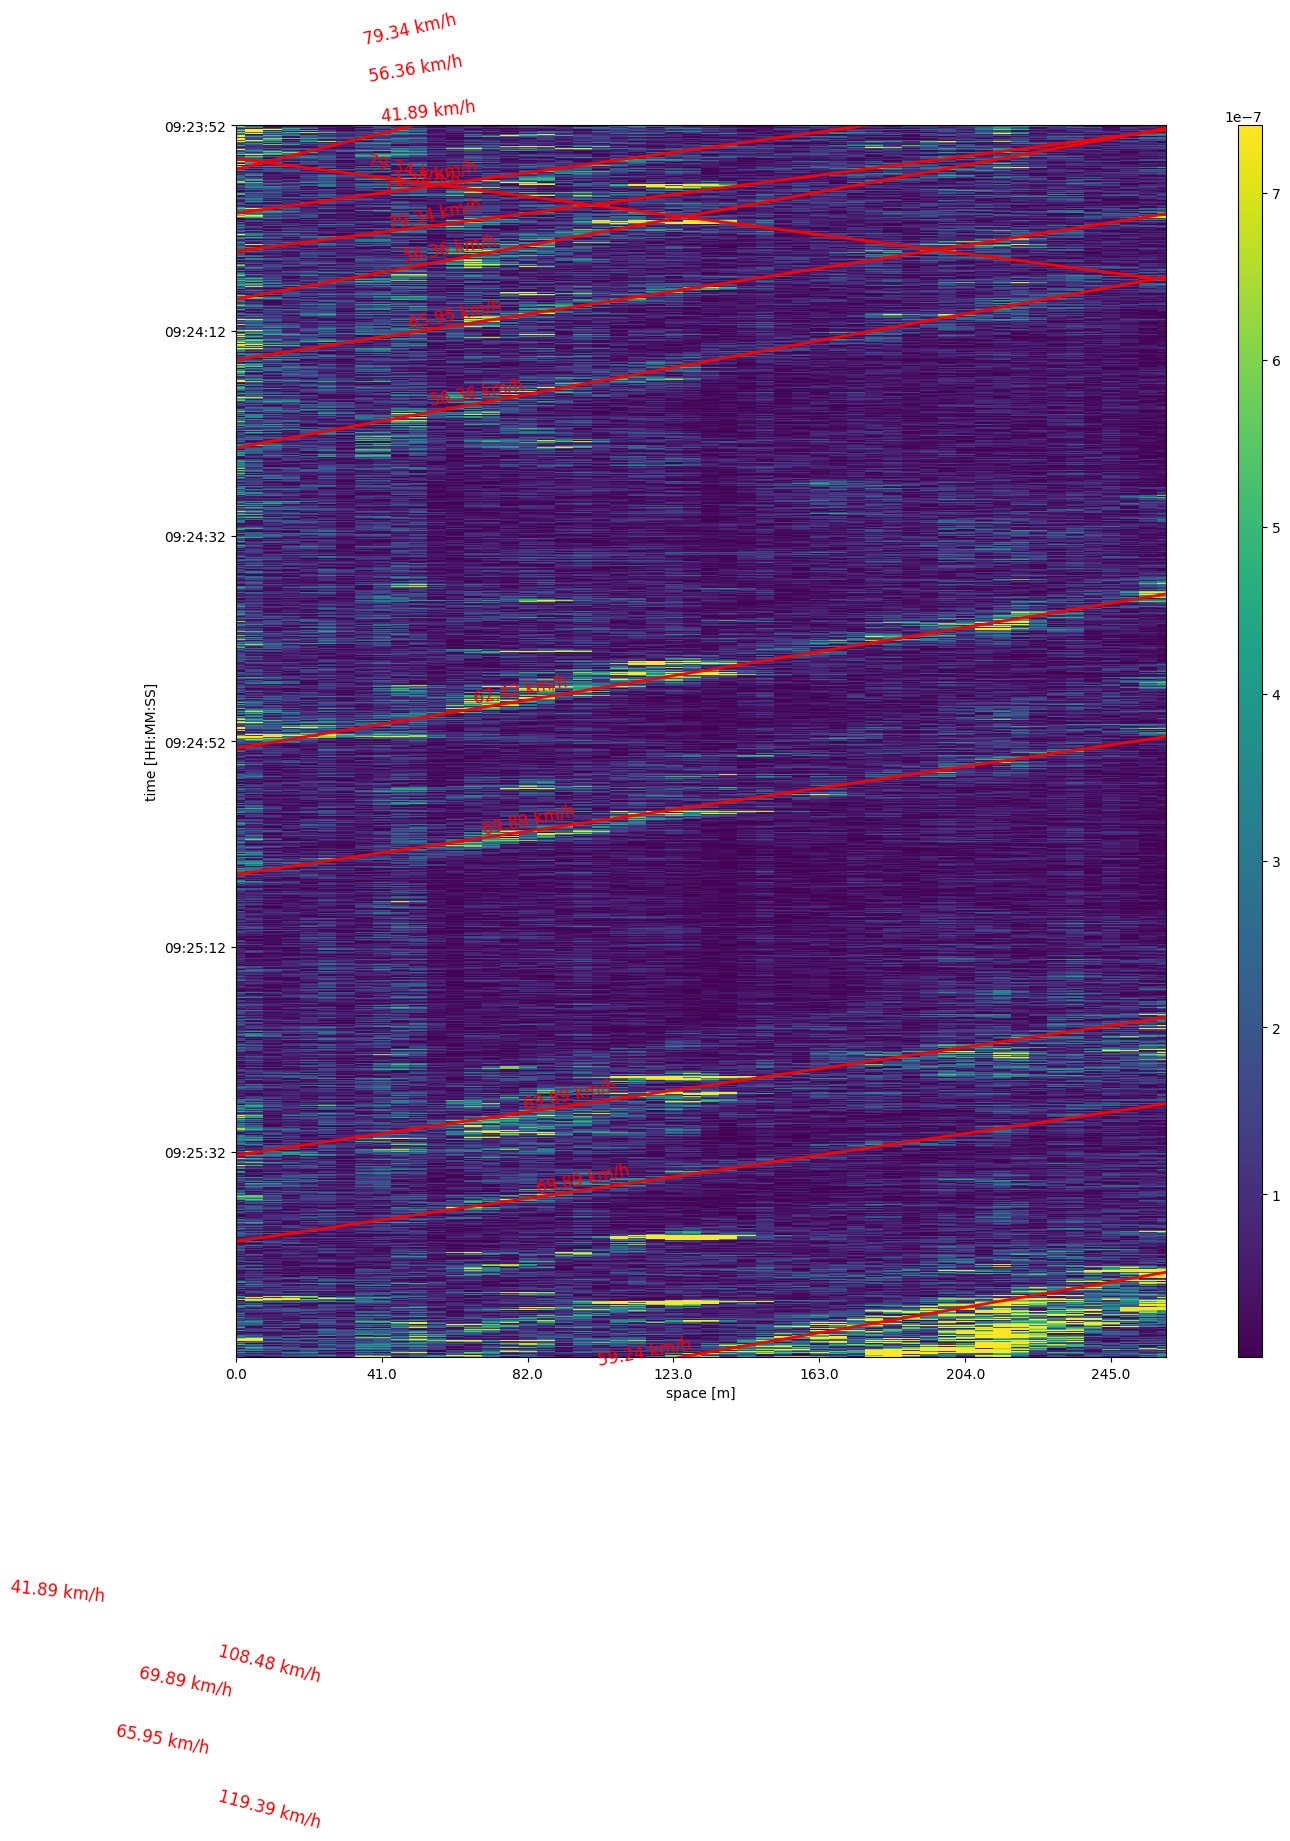

In [99]:
from math import sqrt

vertical_scale = norm_mm_data.shape[0] / scaled_image.shape[0] # 100
horizontal_scale = norm_mm_data.shape[1] / scaled_image.shape[1] # 1/11
print(vertical_scale, horizontal_scale)


tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(scaled_image, theta=tested_angles)
lines = list(zip(*hough_line_peaks(h, theta, d)))

fig = plt.figure(figsize=(12, 16))
ax = plt.axes()

# Display the original image
low, high = np.percentile(df, [3, 99])
norm = Normalize(vmin=low, vmax=high, clip=True)
im = ax.imshow(df,interpolation='none',aspect='auto',norm=norm)
print(im)
plt.ylabel('time [HH:MM:SS]')
plt.xlabel('space [m]')

# Rescale and plot detected lines
for dist, angle, slope, speed  in true_lines:
    # Rescale distance
    dist_original = dist * sqrt((np.cos(angle) / horizontal_scale) ** 2 + (np.sin(angle) / vertical_scale) ** 2) # done

    # Calculate points for the original scale
    (x0, y0) = dist * np.array([np.cos(angle) * horizontal_scale, np.sin(angle) * vertical_scale])

    # Adjust slope for horizontal scaling
    slope_original = slope * vertical_scale/horizontal_scale

    # Plot rescaled line
    ax.axline((x0, y0), slope=slope_original, color='red', linewidth=2)
    # ax.text(30, slope_original * 33 + y0 - slope_original * x0, f"{np.round(speed, 2)} km/h", fontsize=10, color='red', ha='center', va='center')
    offset = -700  # Offset for text above the line
    x_text = x0 + 10  # Slightly along the line's direction
    y_text = slope_original * (x_text - x0) + y0 + offset

    # Calculate rotation angle in degrees for the text to match the line's slope
    rotation_angle = np.degrees(np.arctan(slope)) - 20*np.sign(slope)

    # Add the text
    ax.text(
        x_text, y_text,
        f"{np.round(speed, 2)} km/h",
        fontsize=12,
        color='red',
        ha='center',
        va='center',
        rotation=rotation_angle,  # Align text with the line
        rotation_mode='anchor'  # Ensure text rotates around its anchor point
    )


# Add colorbar
cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df.index.time)
ax.set_yticks(y_positions, y_labels)
ax.set_ylim((74999, 0))
ax.set_xlim((0, 51))
plt.show()